<a href="https://colab.research.google.com/github/Tristant2005/ML-Projects-Master/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Clustering of MNIST dataset**

T-Distributed Stochastic Neighbor Embedding (TSNE) performed on Encoded MNIST Digits. Used Pyplot to visualive results

In [ ]:
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

import seaborn as sns

(60000, 28, 28)
You are looking at a 0


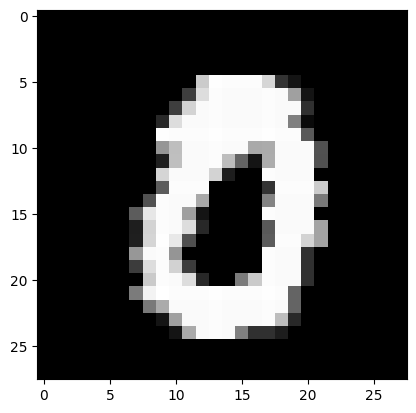

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#there are 60,000 images of size 28x28
# print(train_X[0])

# np.random.seed(69420)
# subsample_idc = np.random.choice(train_X.shape[0], 1000, replace=False)
# train_X = train_X[subsample_idc,:]
# train_y = train_y[subsample_idc]

print(train_X.shape) # (60000, 28, 28)


index = 69
print("You are looking at a", train_y[index])
plt.imshow(train_X[index], cmap=plt.get_cmap('gray'))

# for i in range(9):
#   pyplot.subplot(331 + i)
#   pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# pyplot.show()

In [ ]:
# Normalize data, such that every value is a number between 0 and 1
train_X = train_X / 255
test_X = test_X / 255

In [ ]:
# # Each item in train_X is a 28x28 2D array
# # But we want to combine each 28x28 2D array into one long 784 1D array
# # so we do:

#x1 = keras.layers.Flatten()(input_shape)
train_X = train_X.reshape(len(train_X), (28*28))
test_X = test_X.reshape(len(test_X), (28*28))

print(train_X.shape)
# # (60000, 28, 28) <- 60k elements, each element is 28 lists of 28 elements

(60000, 784)


# **Train Encoder to Transform into lower Dimensions**

In [ ]:
# autoencoder (convolutional?)
# I want to make a better lower-dimension latent space representation of my data for my TSNE method
# Ideal: take from shape (1000, 28, 28) to (1000, 14, 14) then to (1000, 7, 7)

input_shape = keras.Input(shape=(784,))

# These two dense layers that reduce its dimensionality
encoded = keras.layers.Dense(128, activation='relu')(input_shape)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.Dense(32, activation='relu')(encoded)
encoded = keras.layers.Dense(16, activation='relu')(encoded)

encoded = keras.layers.Dense(8, activation='relu')(encoded) #final latency of endcoded layer

decoded = keras.layers.Dense(16, activation='relu')(encoded)
decoded = keras.layers.Dense(32, activation='relu')(encoded)
decoded = keras.layers.Dense(64, activation='relu')(encoded)
decoded = keras.layers.Dense(128, activation='relu')(decoded)

decoded = keras.layers.Dense(784, activation='sigmoid')(decoded) #back to original dimensions


#define and compile model
autoencoder = keras.Model(inputs=input_shape, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(train_X,
                train_X,
                epochs=50,
                batch_size=256,
                shuffle=True,
                verbose=True,
                validation_data=(test_X, test_X))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - loss: 0.3593 - val_loss: 0.2160
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.2055 - val_loss: 0.1816
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1757 - val_loss: 0.1631
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1622 - val_loss: 0.1569
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1557 - val_loss: 0.1508
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1500 - val_loss: 0.1477
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.1474 - val_loss: 0.1450
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1453 - val_loss: 0.1432
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1437 - val_loss: 0.1422
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1421 - val_loss: 0.1407
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.1406 - val_loss: 0.1397
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━

In [ ]:
encoder = keras.Model(autoencoder.input, autoencoder.layers[-4].output)
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,480 (435.47 KB)

 Trainable params: 111,480 (435.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoded_imgs = encoder.predict(train_X)
print(encoded_imgs.shape)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
(60000, 8)


In [ ]:
dimentionality = 2

tsne_model = TSNE(n_components=dimentionality, perplexity=25.0)

'''
n_components: Dimension of the embedded space (2d, 3d, 4d, etc....)
perplexity: The number of nearest neighbors

'''

np.random.seed(69420)
subsample_idc = np.random.choice(encoded_imgs.shape[0], 1000, replace=False)
encoded_imgs = encoded_imgs[subsample_idc,:]
train_y = train_y[subsample_idc]

In [ ]:
tsne_result = tsne_model.fit_transform(encoded_imgs)
print(tsne_result.shape)

# (6000, 2) <- Embedding of the training data in low-dimensional space.

(1000, 2)


In [ ]:
'''
Basically we started with an array of 6000 28x28 2D arrays
Then, we reshaped the array to be an array of 6000 784 1D arrays
Then we flattened the array so that every number is a number between 0 and 1
Now we have a flattened and reshaped array of shape (6000, 784)

We made a very simple autoencoder that transforms the array of (6000, 784) to (6000, 8)

We used sklearn's TSNE function to reduce the dimentionality of our array from 8 to 2

What does this mean? We turned an array of 8 digits, and found a way to express the whole array with just 2 floats
This is done with intelligent math, probabillity and distribution
Now we have a flattened and reshaped array of shape (6000, 2)

Meaning, for each 6000 images, we have a way of representing them with only 2 numbers
Yippeee!!!!!

'''

In [ ]:
item = 999

label = train_y[item]
(x_point, y_point) = tsne_result[item]

print("item #" + str(item) + ":")
print("Label:", label)
print("x:", x_point, '\ny:', y_point)

item #999:
Label: 2
x: -32.608562 
y: 4.676992


In [ ]:
x_coords = []
y_coords = []
numbers = []

for index, item in enumerate(tsne_result):
  x_coords.append(item[0])
  y_coords.append(item[1])
  numbers.append(train_y[index])

# Put all data into a dataFrame
df = pd.DataFrame(dict(x = x_coords, y = y_coords, labels=numbers))

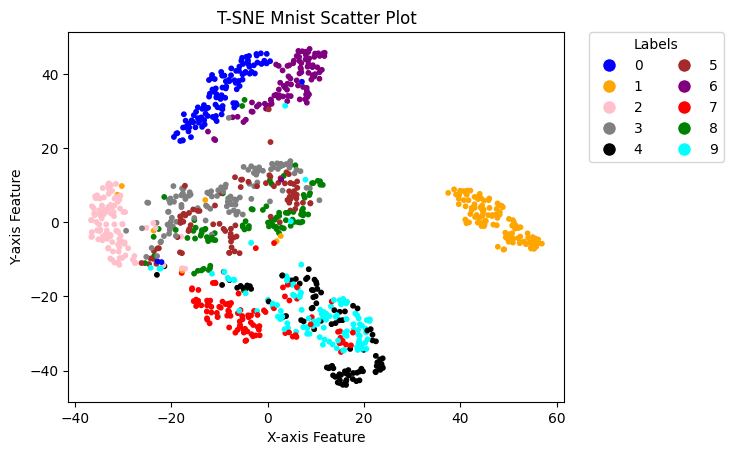

In [ ]:
size = 10
colours = {0: 'blue',
          1: 'orange',
          2: 'pink',
          3: 'grey',
          4: 'black',
          5: 'brown',
          6: 'purple',
          7: 'red',
          8: 'green',
          9: 'cyan'}

# Code to make the scatter plot
plt.scatter(df['x'], df['y'], c=df['labels'].map(colours), s=size)


# Add labels and title
plt.xlabel("X-axis Feature")
plt.ylabel("Y-axis Feature")
plt.title("T-SNE Mnist Scatter Plot")


# Custom legend (**I did not make this**)
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                            markerfacecolor=colours[key], markersize=10)
                 for key in colours.keys()]
plt.legend(legend_labels, [str(key) for key in colours.keys()], title="Labels", ncol=2, bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)


# Show the plot
plt.show()
